## Descriptive Analytics and Data Preprocessing on Sales & Discounts Dataset

In [1]:
import pandas as pd

In [2]:
df=pd.read_csv('sales_data_with_discounts.csv')

In [3]:
df.head()

,Date,Day,SKU,City,Volume,BU,Brand,Model,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,01-04-2021,Thursday,M01,C,15,Mobiles,RealU,RU-10,12100,181500,11.654820,21153.498820,160346.501180
1,01-04-2021,Thursday,M02,C,10,Mobiles,RealU,RU-9 Plus,10100,101000,11.560498,11676.102961,89323.897039
2,01-04-2021,Thursday,M03,C,7,Mobiles,YouM,YM-99,16100,112700,9.456886,10657.910157,102042.089843
3,01-04-2021,Thursday,M04,C,6,Mobiles,YouM,YM-99 Plus,20100,120600,6.935385,8364.074702,112235.925298
4,01-04-2021,Thursday,M05,C,3,Mobiles,YouM,YM-98,8100,24300,17.995663,4372.946230,19927.053770


In [4]:
numerical_columns = df.select_dtypes(include=['int', 'float'])

In [5]:
numerical_columns

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,15,12100,181500,11.654820,21153.498820,160346.501180
1,10,10100,101000,11.560498,11676.102961,89323.897039
2,7,16100,112700,9.456886,10657.910157,102042.089843
3,6,20100,120600,6.935385,8364.074702,112235.925298
4,3,8100,24300,17.995663,4372.946230,19927.053770
...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127
446,6,2600,15600,17.057027,2660.896242,12939.103758
447,2,1600,3200,18.965550,606.897606,2593.102394
448,3,1900,5700,16.793014,957.201826,4742.798174


In [6]:
mean=numerical_columns.mean()
mean

Volume                   5.066667
Avg Price            10453.433333
Total Sales Value    33812.835556
Discount Rate (%)       15.155242
Discount Amount       3346.499424
Net Sales Value      30466.336131
dtype: float64

In [7]:
median=numerical_columns.median()
median

Volume                  4.000000
Avg Price            1450.000000
Total Sales Value    5700.000000
Discount Rate (%)      16.577766
Discount Amount       988.933733
Net Sales Value      4677.788059
dtype: float64

In [8]:
mode=numerical_columns.mode().iloc[0]
mode

Volume                   3.000000
Avg Price              400.000000
Total Sales Value    24300.000000
Discount Rate (%)        5.007822
Discount Amount         69.177942
Net Sales Value        326.974801
Name: 0, dtype: float64

In [9]:
std_dev=numerical_columns.std()
std_dev

Volume                   4.231602
Avg Price            18079.904840
Total Sales Value    50535.074173
Discount Rate (%)        4.220602
Discount Amount       4509.902963
Net Sales Value      46358.656624
dtype: float64

In [10]:
statistics_df=pd.DataFrame({'Mean': mean,'Median': median,'Mode': mode,'Standard Deviation': std_dev})

In [11]:
statistics_df

,Mean,Median,Mode,Standard Deviation
Volume,5.066667,4.000000,3.000000,4.231602
Avg Price,10453.433333,1450.000000,400.000000,18079.904840
Total Sales Value,33812.835556,5700.000000,24300.000000,50535.074173
Discount Rate (%),15.155242,16.577766,5.007822,4.220602
Discount Amount,3346.499424,988.933733,69.177942,4509.902963
Net Sales Value,30466.336131,4677.788059,326.974801,46358.656624


In [12]:
## The above data shows the mean, median, mode and standard deviation for all the numerical columns

## Histogram

In [13]:
import matplotlib.pyplot as plt
import scipy.stats as stats
from scipy.stats import skew,kurtosis
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')

array([[<Axes: title={'center': 'Volume'}>,
        <Axes: title={'center': 'Avg Price'}>],
       [<Axes: title={'center': 'Total Sales Value'}>,
        <Axes: title={'center': 'Discount Rate (%)'}>],
       [<Axes: title={'center': 'Discount Amount'}>,
        <Axes: title={'center': 'Net Sales Value'}>]], dtype=object)

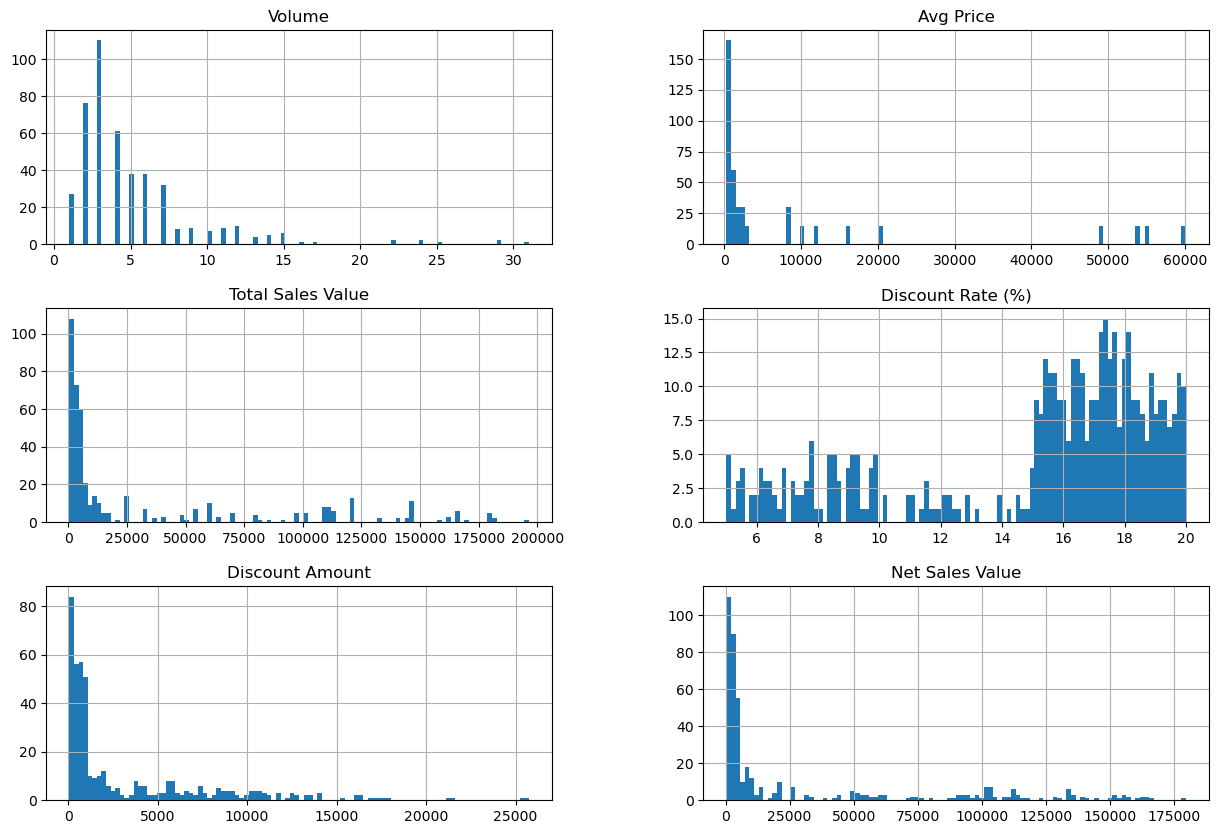

In [14]:
df.hist(bins=100,figsize=(15,10))

[-1.49828445 -1.36318737  1.19788561 -1.53711726]


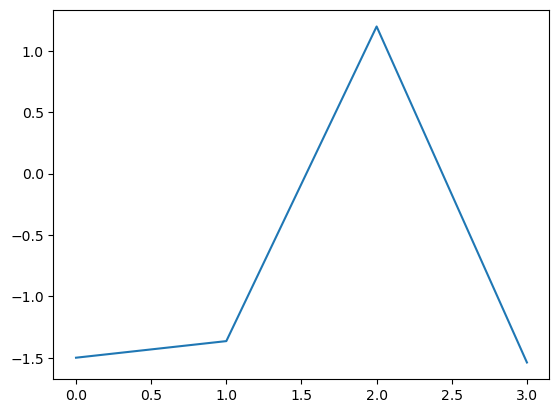

In [15]:
print(kurtosis(statistics_df))
plt.plot(kurtosis(statistics_df))

[0.54620814 0.60160217 1.78767677 0.49254846]


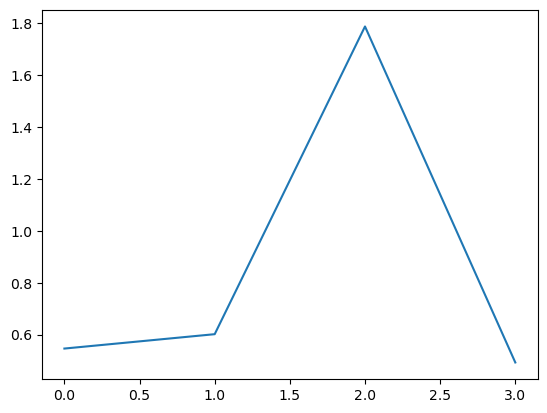

In [16]:
print(skew(statistics_df))
plt.plot(skew(statistics_df))

## Boxplot

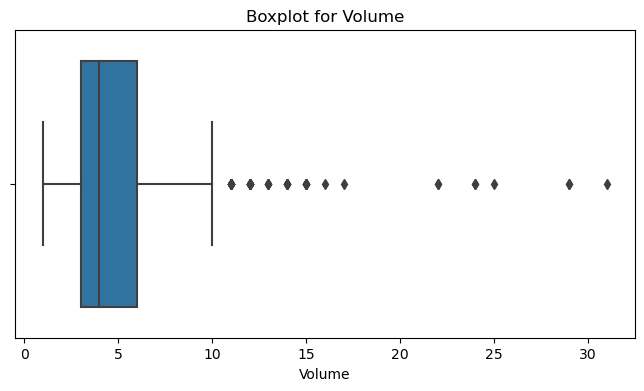

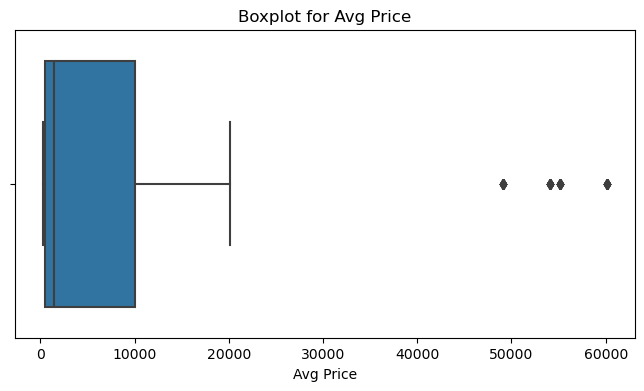

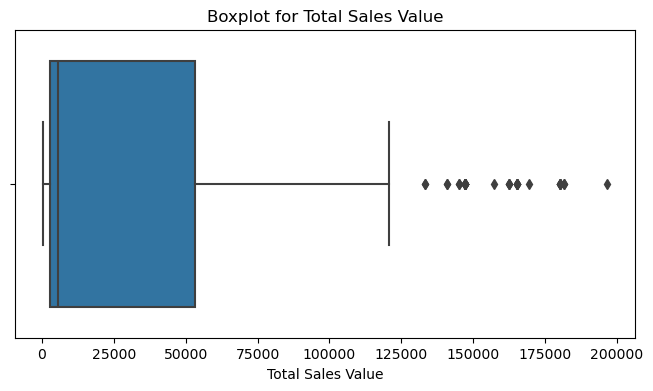

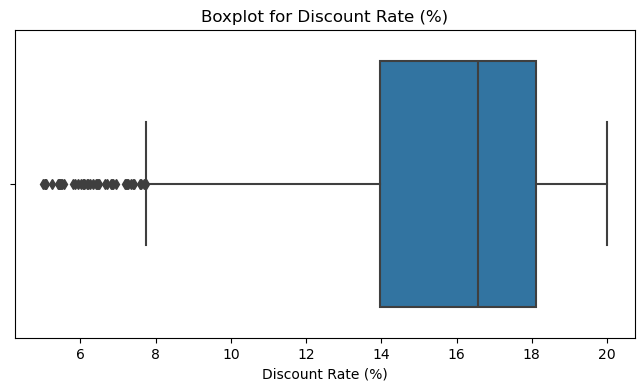

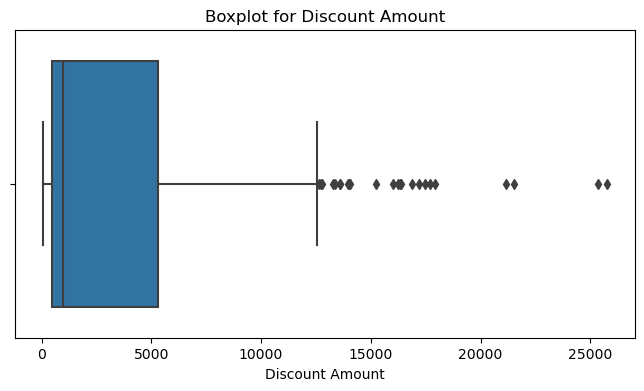

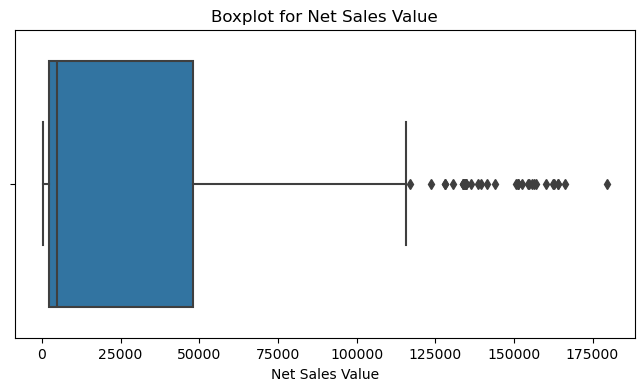

In [17]:
for column in numerical_columns:
    plt.figure(figsize=(8, 4))
    sns.boxplot(x=df[column])
    plt.title(f'Boxplot for {column}')
    plt.xlabel(column)
    plt.show()

    # Calculate IQR and identify outliers
    Q1 = df[column].quantile(0.25)
    Q3 = df[column].quantile(0.75)
    IQR = Q3 - Q1
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    outliers = df[(df[column] < lower_bound) | (df[column] > upper_bound)][column]

## Bar Chart Analysis for Categorical Column:

In [18]:
cat_columns=df.select_dtypes(include=['object', 'category']).columns

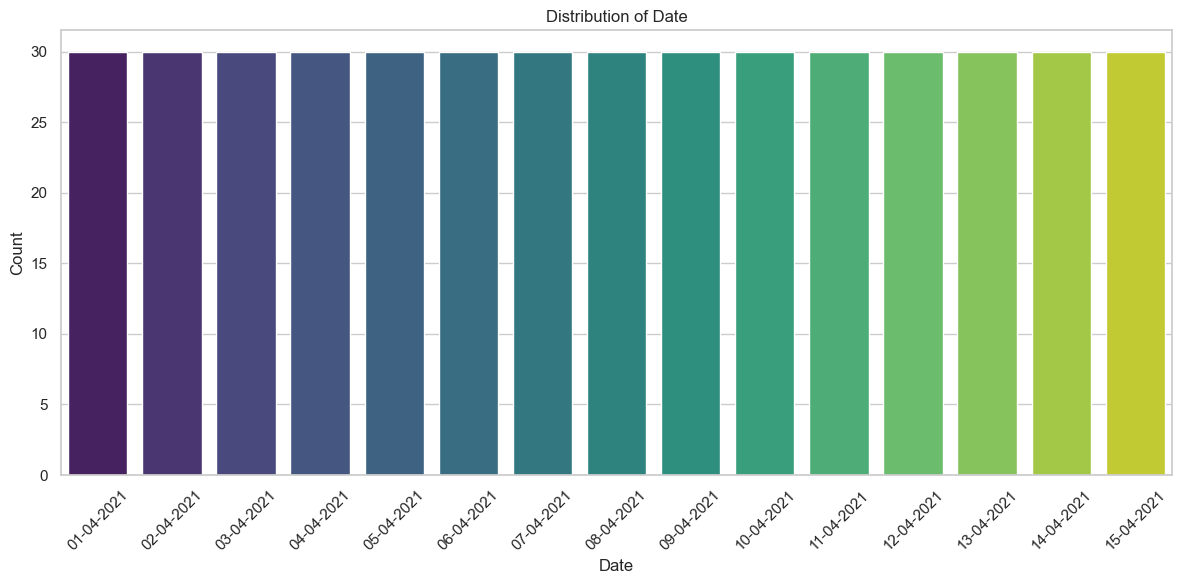

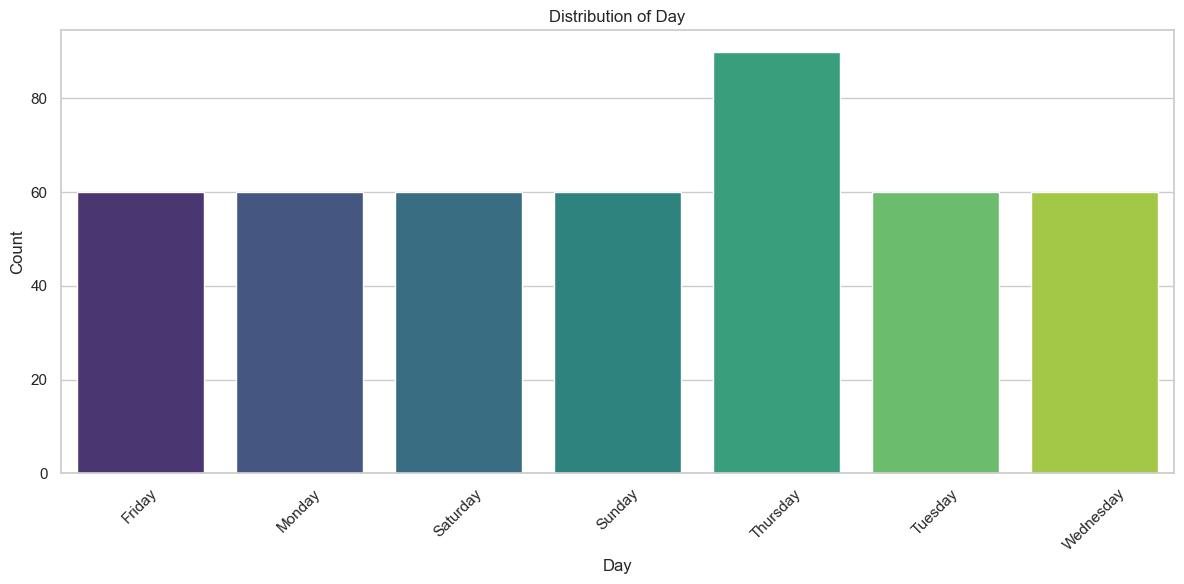

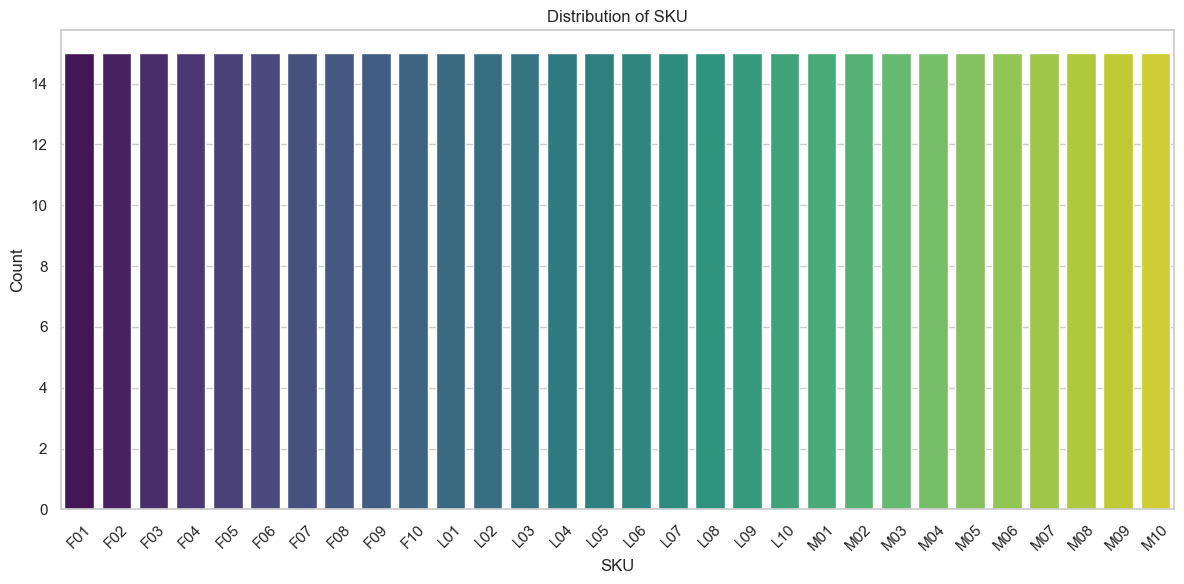

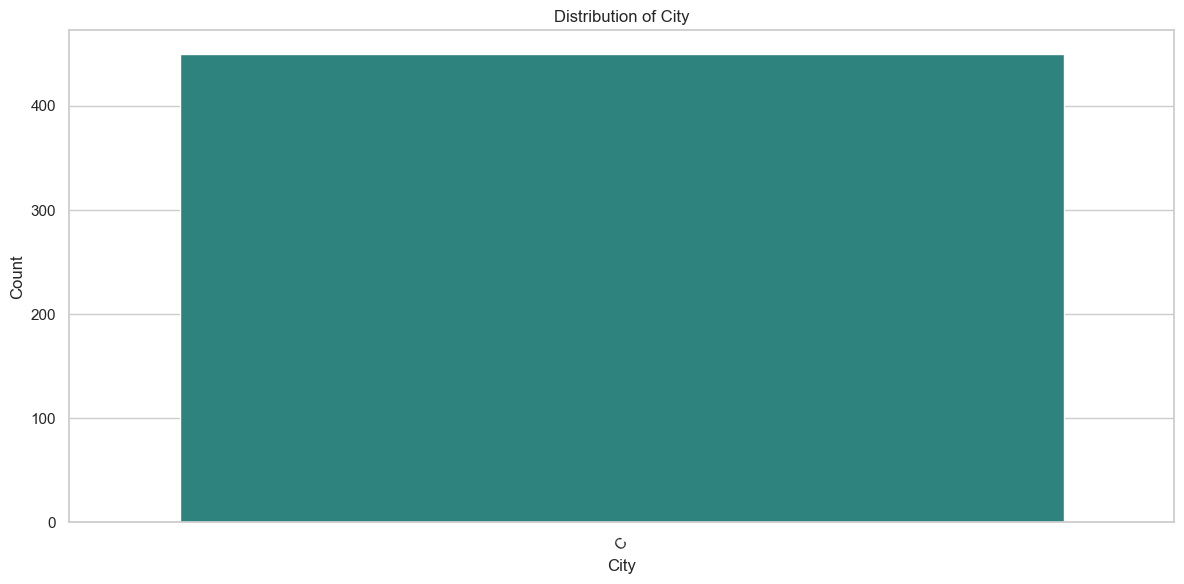

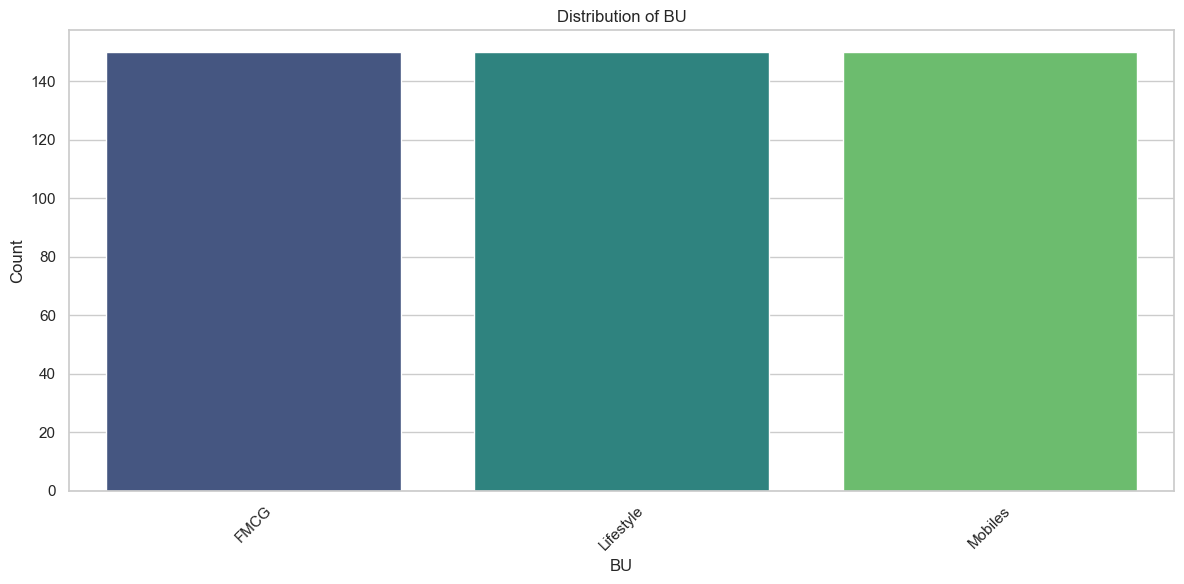

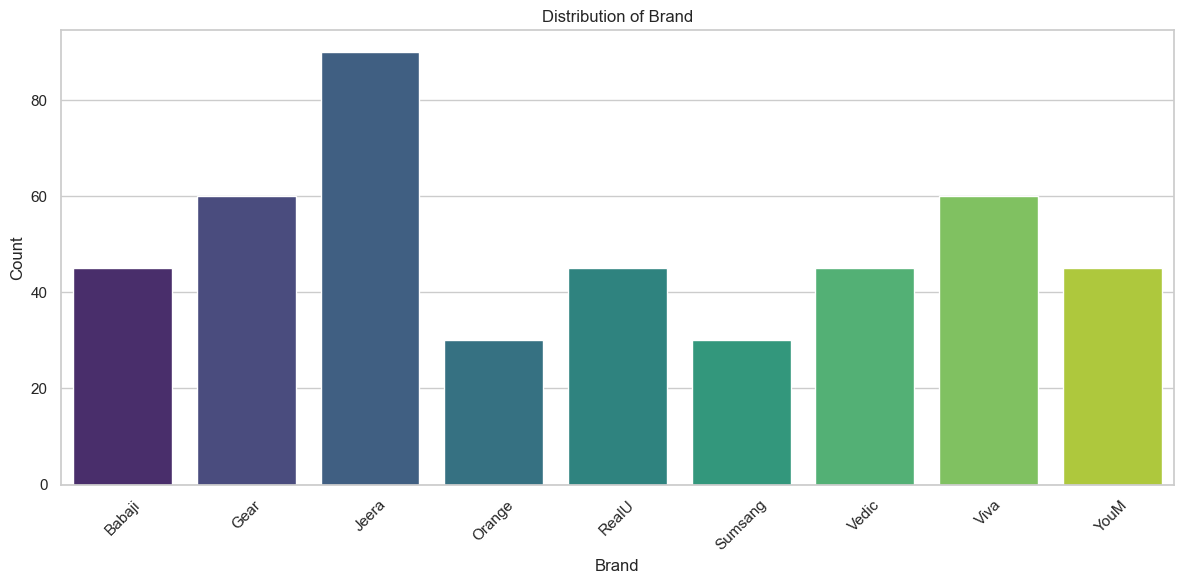

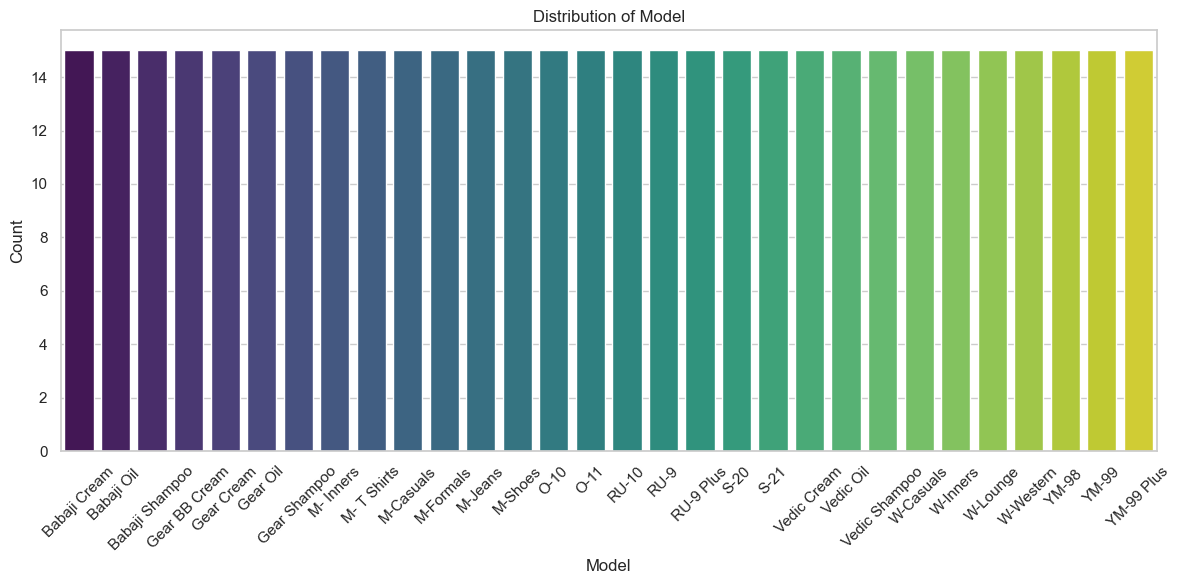

In [19]:
sns.set(style='whitegrid')
for column in cat_columns:
    plt.figure(figsize=(12, 6))
    value_counts = df[column].value_counts().sort_index()
    sns.barplot(x=value_counts.index, y=value_counts.values, palette='viridis')
    plt.title(f'Distribution of {column}')
    plt.xlabel(column)
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    
    plt.tight_layout()
    plt.show()

## Insights

Date:
- Total unique categories: 15
- The distribution is more evenly spread across categories.

Day:
- Total unique categories: 7
- Most frequent category: Thursday with 90 occurrences
- Least frequent category: Friday with 60 occurrences
- The distribution is more evenly spread across categories.

SKU:
- Total unique categories: 30
- Most frequent category: M01 with 15 occurrences
- Least frequent category: M01 with 15 occurrences
- The distribution is more evenly spread across categories

City:
- Total unique categories: 1
- Frequent category: C with 450 occurrences
- The distribution is highly skewed towards the most frequent category.

BU:
- Total unique categories: 3
- Frequent category: Mobiles with 150 occurrences
- The distribution is more evenly spread across categories.

Brand:
- Total unique categories: 9
- Most frequent category: Jeera with 90 occurrences
- Least frequent category: Sumsang with 30 occurrences
- The distribution is more evenly spread across categories.

Model:
- Total unique categories: 30
- Frequent category:15 occurrences
- The distribution is more evenly spread across categories.

## Standardization of Numerical Variables

In [20]:
import numpy as np

Standardization involves transforming your data to center around the mean with a standard deviation of 1.
Standardization, also known as z-score normalization, is a process used to scale numerical variables 
so they have a mean of 0 and a standard deviation of 1.
This technique is particularly useful in preparing data for machine learning models, especially those that are sensitive to the scale of the input features, like k-nearest neighbors (KNN) and principal component analysis (PCA)

The formula for Standardization is z=(x-mu)/sigma

In [21]:
x=numerical_columns
mu=mean
sigma=std_dev

In [22]:
standard_data=(x-mu)/sigma
standard_data

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value
0,2.347417,0.091072,2.922469,-0.829365,3.948422,2.801638
1,1.165831,-0.019548,1.329516,-0.851714,1.846958,1.269613
2,0.456880,0.312312,1.561038,-1.350129,1.621190,1.543957
3,0.220563,0.533552,1.717365,-1.947555,1.112568,1.763847
4,-0.488389,-0.130168,-0.188242,0.672990,0.227598,-0.227342
...,...,...,...,...,...,...
445,-0.724706,-0.506277,-0.617647,0.075924,-0.652815,-0.609783
446,0.220563,-0.434374,-0.360400,0.450596,-0.152022,-0.378079
447,-0.724706,-0.489684,-0.605774,0.902788,-0.607464,-0.601252
448,-0.488389,-0.473091,-0.556303,0.388042,-0.529789,-0.554881


##### Before and after comparison of data distribution

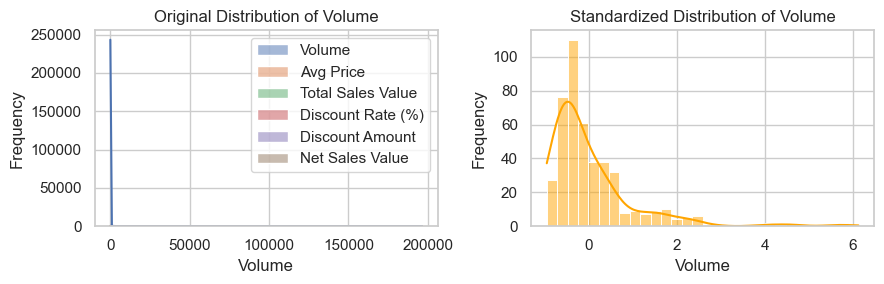

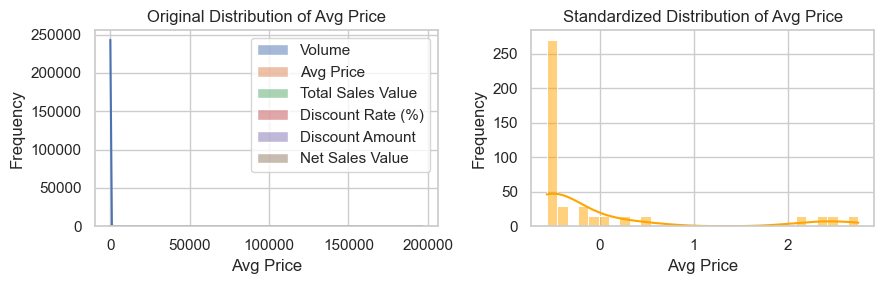

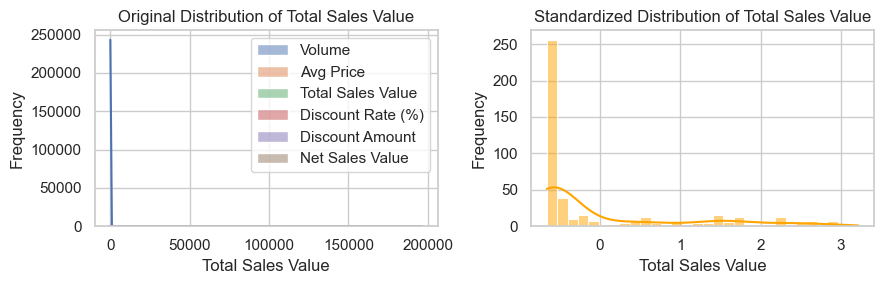

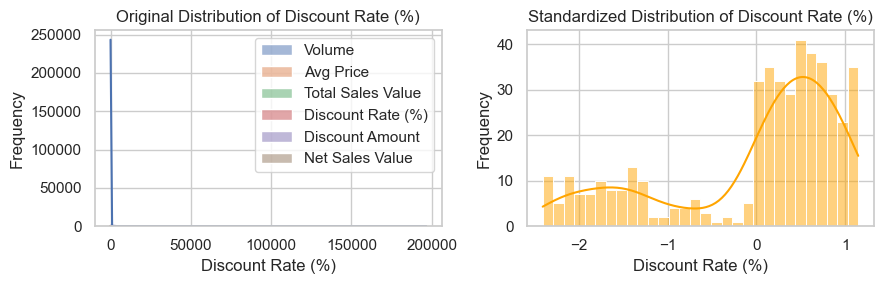

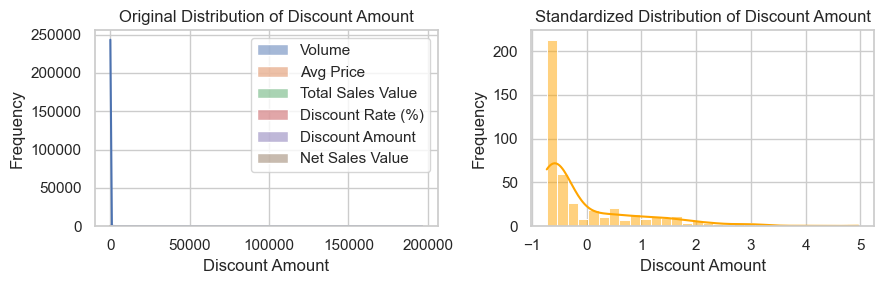

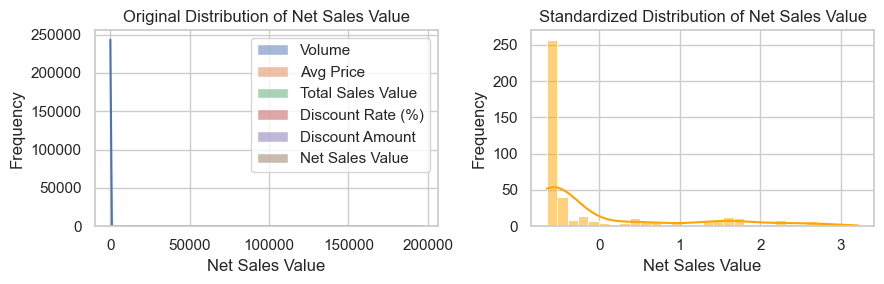

In [23]:
for column in numerical_columns:
    fig, axes = plt.subplots(1, 2, figsize=(9, 3))
    
    sns.histplot(numerical_columns, bins=30, kde=True,ax=axes[0])
    axes[0].set_title(f'Original Distribution of {column}')
    axes[0].set_xlabel(column)
    axes[0].set_ylabel('Frequency')
    
    sns.histplot(standard_data[column], bins=30, kde=True, ax=axes[1], color='orange')
    axes[1].set_title(f'Standardized Distribution of {column}')
    axes[1].set_xlabel(column)
    axes[1].set_ylabel('Frequency')
    
    plt.tight_layout()
    plt.show()

## Conversion of Categorical Data into Dummy Variables

##### Need for Converting Categorical Data into dummy variables (one-hot encoding).
Machine learning algorithms, particularly those based on mathematical computations, typically require numerical input. Categorical data, which includes non-numeric information like city names or product categories, needs to be encoded numerically so that:

Models Can Process Data: Algorithms like decision trees and neural networks need numerical input to calculate distances or make decisions.
    Avoid Ordinal Bias: By one-hot encoding, we avoid assigning arbitrary numeric values that might imply an order or priority where none exists

In [24]:
df_encoded = pd.get_dummies(df, columns=cat_columns)
df_encoded

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
1,10,10100,101000,11.560498,11676.102961,89323.897039,True,False,False,False,...,False,False,False,False,False,False,False,False,False,False
2,7,16100,112700,9.456886,10657.910157,102042.089843,True,False,False,False,...,False,False,False,False,False,False,False,False,True,False
3,6,20100,120600,6.935385,8364.074702,112235.925298,True,False,False,False,...,False,False,False,False,False,False,False,False,False,True
4,3,8100,24300,17.995663,4372.946230,19927.053770,True,False,False,False,...,False,False,False,False,False,False,False,True,False,False
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False
446,6,2600,15600,17.057027,2660.896242,12939.103758,False,False,False,False,...,False,False,False,False,False,False,True,False,False,False
447,2,1600,3200,18.965550,606.897606,2593.102394,False,False,False,False,...,False,False,False,False,False,True,False,False,False,False
448,3,1900,5700,16.793014,957.201826,4742.798174,False,False,False,False,...,False,False,False,False,False,False,False,False,False,False


In [25]:
dummies=df_encoded.replace({False:0,True:1})
dummies

,Volume,Avg Price,Total Sales Value,Discount Rate (%),Discount Amount,Net Sales Value,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,15,12100,181500,11.654820,21153.498820,160346.501180,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,10,10100,101000,11.560498,11676.102961,89323.897039,1,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,7,16100,112700,9.456886,10657.910157,102042.089843,1,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,6,20100,120600,6.935385,8364.074702,112235.925298,1,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,3,8100,24300,17.995663,4372.946230,19927.053770,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,2,1300,2600,15.475687,402.367873,2197.632127,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,6,2600,15600,17.057027,2660.896242,12939.103758,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,2,1600,3200,18.965550,606.897606,2593.102394,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,3,1900,5700,16.793014,957.201826,4742.798174,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [26]:
dummies1=dummies.drop(numerical_columns,axis=1)
dummies1

,Date_01-04-2021,Date_02-04-2021,Date_03-04-2021,Date_04-04-2021,Date_05-04-2021,Date_06-04-2021,Date_07-04-2021,Date_08-04-2021,Date_09-04-2021,Date_10-04-2021,...,Model_Vedic Cream,Model_Vedic Oil,Model_Vedic Shampoo,Model_W-Casuals,Model_W-Inners,Model_W-Lounge,Model_W-Western,Model_YM-98,Model_YM-99,Model_YM-99 Plus
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,1,0
3,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,1
4,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,1,0,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
445,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
446,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,1,0,0,0
447,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,1,0,0,0,0
448,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


#####  The importance of data preprocessing steps like standardization and one-hot encoding in data analysis and machine learning.

In [27]:
# Standardization
# Improves Model Convergence: Algorithms that rely on distance metrics (e.g., K-Nearest Neighbors, Support Vector Machines, and Neural Networks) converge faster when data is standardized. This is because features with larger ranges can disproportionately influence the model.
# Ensures Fairness: Standardization ensures that each feature contributes equally to the distance calculations, preventing features with larger scales from dominating the learning process.
# Enhances Interpretability: By scaling features, you make it easier to interpret the coefficients of linear models.

# One-Hot Encoding
# Handles Categorical Data: Many machine learning algorithms require numerical input, and one-hot encoding allows categorical data to be used in these models.
# Prevents Ordinal Interpretation: It avoids misleading ordinal interpretations of categorical variables by treating each category as distinct and separate, with no implied order.
# Maintains Information: One-hot encoding preserves the categorical information without imposing a hierarchy or ranking.